In [1]:
from MLP import MLP
from ETL import ETL, DataLoader
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Testing Data')

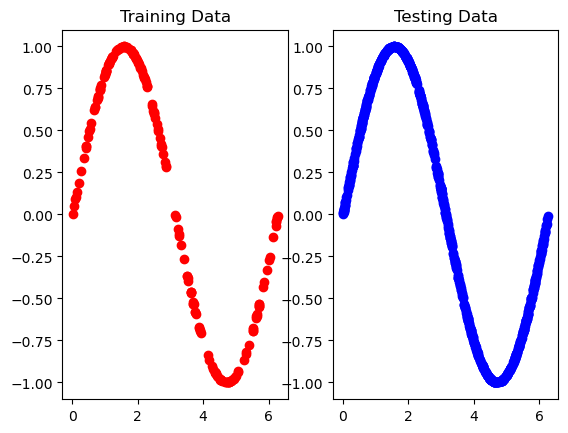

In [13]:
X_train = np.random.uniform(0,2*np.pi,200).reshape(-1,1)
y_train = np.sin(X_train)

X_test = np.random.uniform(0,2*np.pi,800).reshape(-1,1)
y_test = np.sin(X_test)

fig, ax = plt.subplots(1,2)
ax[0].scatter(X_train, y_train, c='r')
ax[0].set_title('Training Data')
ax[1].scatter(X_test, y_test, c='b')
ax[1].set_title('Testing Data')

In [14]:
train_loader = DataLoader(X_train, y_train, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(X_test, y_test, batch_size=32, shuffle=True, drop_last=True)

In [21]:
mlp = MLP([1, 128, 128, 128, 1], ['tanh', 'tanh', 'relu', 'linear'], loss='mse')
training_loss, testing_loss = mlp.train(train_loader, test_loader, epochs=750, lr=0.01)

Epoch 0, batch 0, loss 3.3556337356567383
Epoch 1, batch 0, loss 0.5119600296020508
Epoch 2, batch 0, loss 0.4094216525554657
Epoch 3, batch 0, loss 0.3701387345790863
Epoch 4, batch 0, loss 0.29983144998550415
Epoch 5, batch 0, loss 0.21855880320072174
Epoch 6, batch 0, loss 0.23905867338180542
Epoch 7, batch 0, loss 0.13907814025878906
Epoch 8, batch 0, loss 0.10399146378040314
Epoch 9, batch 0, loss 0.1364380419254303
Epoch 10, batch 0, loss 0.14027932286262512
Epoch 11, batch 0, loss 0.4697810709476471
Epoch 12, batch 0, loss 0.11023819446563721
Epoch 13, batch 0, loss 0.120663583278656
Epoch 14, batch 0, loss 0.10008549690246582
Epoch 15, batch 0, loss 0.06878615915775299
Epoch 16, batch 0, loss 0.13126744329929352
Epoch 17, batch 0, loss 0.11092324554920197
Epoch 18, batch 0, loss 0.11759021133184433
Epoch 19, batch 0, loss 0.12438506633043289
Epoch 20, batch 0, loss 0.10462900996208191
Epoch 21, batch 0, loss 0.08102525770664215
Epoch 22, batch 0, loss 0.10366256535053253
Epoch 

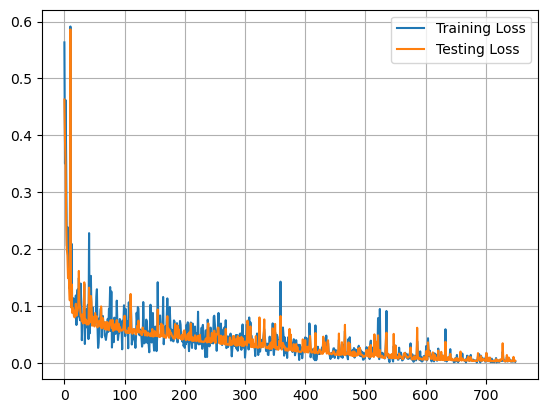

In [22]:
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.grid()
plt.legend()

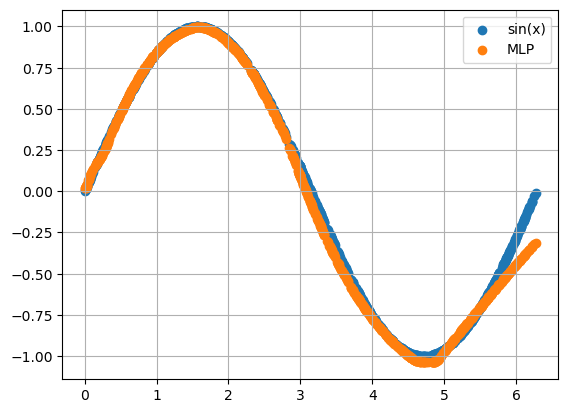

In [23]:
y_pred = mlp.batched_predict(X_test)

plt.scatter(X_test, y_test, label='sin(x)')
plt.scatter(X_test, y_pred, label='MLP')
plt.legend()
plt.grid()